In [2]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # cv
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
iris = load_iris()

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

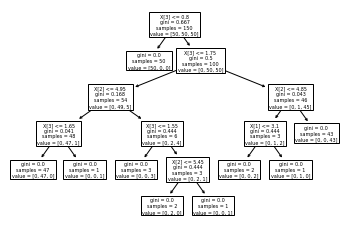

In [3]:
clf = clf.fit(iris.data, iris.target)
tree.plot_tree(clf)

# 트리 : 정보이득 : 불순도 ("gini”-계수, “entropy”)
                            - hyper parameter => GridSearcjCV
        -정보이득을 올리려면 불순도가 낮아야 한다.

# 의사결정 트리를 만드는 이유
 - 판단을 적게하기 위하여

# 과적합, 변수의 순서를 달리하면 결과도 달라진다는 문제
 - max_depth가 깊어지면 나눌 필요도 없는 데이터를 나눔
 - 끝단을 leaf : min_samples_split : 노드를 나누기 위한 최소개수
 - min_samples_leaf : 하나의 노드가 되기 위한 최소한의 수
 - hyper parameter 조합을 만들어서 테스트 : GridSearchCV

In [4]:
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [5]:
print(clf.get_n_leaves()) # 끝단의 개수

9


In [6]:
clf.get_depth() # 깊이

5

In [7]:
clf.get_params() # default 값

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [9]:
# 품종
print(iris.data.shape) # 차원
print(iris.feature_names) # 열이름

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
import pandas as pd

data = pd.DataFrame(iris.data)
print(data.head())

clf.predict(data.iloc[1:150,:])

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB # bayes
from sklearn.preprocessing import Binarizer # 경계값을 기준으로 0,1로 나눠줌
pipe = make_pipeline(Binarizer(), MultinomialNB())

In [17]:
print(pipe.steps[0])
print(pipe[0])

#pipe['reduce_dim']

('binarizer', Binarizer(copy=True, threshold=0.0))
Binarizer(copy=True, threshold=0.0)


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC # support vector classifier
from sklearn.decomposition import PCA # priciple component analysis

estimators = [('reduce_dim', PCA()), (('clf'), SVC())]
pipe = Pipeline(estimators)
pipe

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [22]:
print(pipe.steps[0]) # PCA , 함수를 불러오는 아이
print(pipe[0]) # 설명

('reduce_dim', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False))
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [23]:
pipe.set_params(clf__C=10) # 매개변수를 전달하기 위해서
                           # SVC에 C라는 값을 불러오고 싶기 때문에 (지정해 준 이름)__C로 호출
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Pipeline(memory=None,
         steps=[('reduce_dim',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

# GridSearchCV

In [63]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1)**2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X,y
X,y = make_data(40)
print(type(X))

<class 'numpy.ndarray'>


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV #parameter turning
from sklearn.preprocessing import PolynomialFeatures

# 파이프라인 리턴
def PolynomialRegression(degree=2, **kwargs): # dict 변동 매개변수
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True,False],
             'linearregression__normalize':[True,False]}

In [65]:
# cross validation
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [66]:
grid.fit(X,y)

C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                        

In [67]:
grid.best_params_ # 비선형회귀 4차일 경우 가장 좋은 결과가 나왔다.

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

In [68]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                                  normalize=True))],
         verbose=False)

In [70]:
grid.best_score_

0.8956938691106144

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

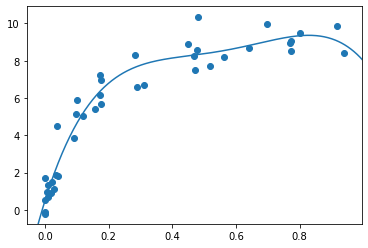

In [73]:
import matplotlib.pyplot as plt
model = grid.best_estimator_

X_test = np.linspace(-0.1, 1.1, 500)[:, None] # 행번호를 붙이고 열은 없다. => 데이터 모양을 만들기 위해서 사용
plt.scatter(X.ravel(), y) # ravel: 데이터를 평평하게 1차원으로
lim = plt.axis()
y_test = model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [81]:
import numpy as np
import pandas as pd

dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10] 
outliers = []

def detect_outlier(data_1):
    threshold=3
    mean_1 = np.mean(data_1) # 평균
    std_1 = np.std(data_1)   # 표준편차
    for y in data_1:
        z_score = (y - mean_1)/std_1 # z점수
        
        if np.abs(z_score) > threshold: # 문지방 : 경계값
            outliers.append(y)
    return outliers

outlier_datapoints = detect_outlier(dataset)
print(outlier_datapoints)

[100]


[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


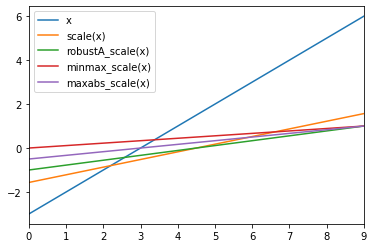

In [84]:
%matplotlib inline
# scale z점수
# robust_scale 평균: mediaan(위치적 중위수)
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
print((np.arange(10, dtype=np.float)-3))
x = (np.arange(10, dtype = np.float)-3).reshape(-1,1)
# print(x)
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                 columns = ['x', 'scale(x)', 'robustA_scale(x)', 'minmax_scale(x)', 'maxabs_scale(x)'])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균 [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std [1. 1. 1. 1.]


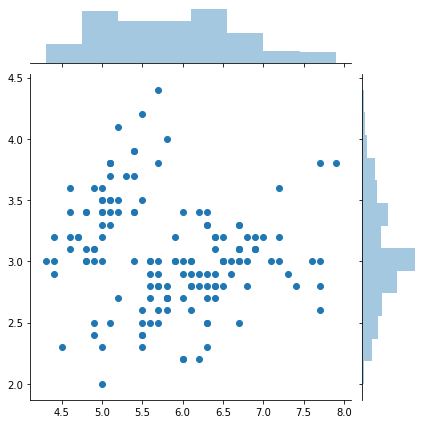

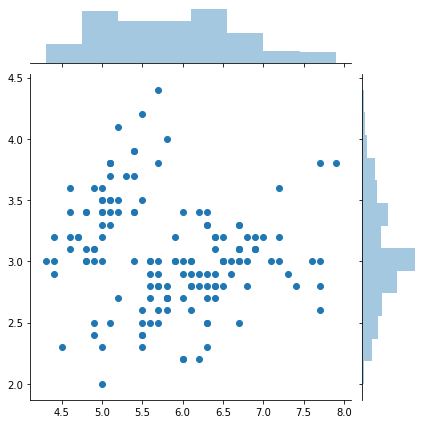

In [86]:
# 분포는 동일
# 정규화를 왜하는가? 변수기여도를 동일하게 하기 위해서
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))
data1 = iris.data
data2 = scale(iris.data)

print("전처리전 평균", np.mean(data1, axis=0))
print("전처리전 std", np.std(data1, axis=0))
print("전처리후 mean", np.mean(data2, axis=0))
print("전처리후 std", np.std(data2, axis=0))

sns.jointplot(data1[:,0],data1[:,1])
plt.show()
sns.jointplot(data1[:,0],data1[:,1])
plt.show()

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 인스턴스
scaler.fit(data1)
data2 = scaler.transform(data1) # transformer(변환기), estimator(추정기)
data1.std(), data2.std()

(1.9738430577598278, 1.0)

In [90]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
X = np.array([[0],[1],[2]])
X
ohe.fit(X)
print(ohe.n_values_, ohe.feature_indices_, ohe.active_features_)
ohe.categories_

[3] [0 3] [0 1 2]


C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``n_values_`` attribute was deprecated in version 0.20 and will be removed 0.22.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:100: DeprecationWarning: The ``feature_indices_`` attribute was deprecated in version 0.20 and will be 

[array([0., 1., 2.])]

In [91]:
print(ohe.transform(X).toarray())

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [94]:
# 입력 3자리 => 10자리로 변경
# why? 첫자리 2, 둘째 3, 셋째 5가지
X = np.array([[0,0,4],[1,1,0],[0,2,1],[1,0,2],[1,1,3]])

ohe = OneHotEncoder()
ohe.fit(X)
ohe.transform(X).toarray() # 리스트로 보여줌

C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 1., 0.]])

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1,2,2,6])
le.classes_

array([1, 2, 6])

In [98]:
le.transform([1,1,2,6])

array([0, 0, 1, 2], dtype=int64)

In [99]:
le.inverse_transform([0,0,1,2])

array([1, 1, 2, 6])

In [ ]:
# 다음 데잍터를 인코딩하시오.
["서울","서울","대전","부산"]

In [100]:
le.fit(["서울","서울","대전","부산"])
le.classes_

array(['대전', '부산', '서울'], dtype='<U2')

In [103]:
le.transform(["서울","서울","부산"])
list(le.inverse_transform([2,2,1]))

['서울', '서울', '부산']

In [105]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo':1,'bar':2},{'foo':3,'baz':1}]
X = v.fit_transform(D)
X

# 글짜는 알파벳 순서대로 들어감
# 'bar', 'baz', 'foo'

array([[2., 0., 1.],
       [0., 1., 3.]])

In [106]:
v.feature_names_

['bar', 'baz', 'foo']

In [107]:
v.inverse_transform(X)

[{'bar': 2.0, 'foo': 1.0}, {'baz': 1.0, 'foo': 3.0}]

In [110]:
# 결측치 처리
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
X = [[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [111]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3,2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [114]:
# [1, a, b, a^2, a*b, b^2] => 비선형회귀
poly = PolynomialFeatures(2) # 다항식 계산 결과값을 속성값으로 추가
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

# Ensemble학습

# RandomForest : DT를 여러개의 모델로 구축해서
   - 연속형: 결과값의 평균으로 예측
   - 이산형: 결과값의 투표를 통해서 결정

In [119]:
from sklearn.datasets import make_classification
X,y = make_classification(1000)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # 기본은 10
#rf = RandomForestClassifier(n_estimators=30) # 최적화
rf.fit(X,y)

C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [120]:
print("Accuracy:\t", (y == rf.predict(X)).mean())

Accuracy:	 0.994


Text(0.5, 1.0, '특성중요도')

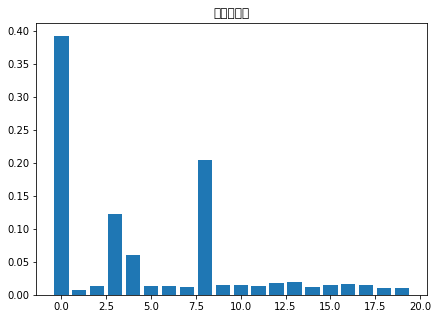

In [123]:
f, ax = plt.subplots(figsize=(7,5))
ax.bar(range(0, len(rf.feature_importances_)), rf.feature_importances_)
ax.set_title('특성중요도')

In [125]:
print("특성수", rf.n_features_)
print("모델", rf.estimators_)

특성수 20
모델 [DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=143820238, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=965703891, splitter='best'), DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                      

# 문제
# load_boston()을 이용해 데이터를 로딩하고 rf로 변수중요도를 출력해 보시오.

In [139]:
from sklearn.datasets import load_boston # 회귀 or 분류
# 회귀이다.
from sklearn.ensemble import RandomForestRegressor

boston = load_boston()
X = boston["data"]
Y = boston["target"]

names = boston["feature_names"]
rf = RandomForestRegressor()
rf.fit(X,Y)

C:\Users\ICT01_22\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [141]:
print(sorted(zip(map(lambda x: round(x,2),
                    rf.feature_importances_), names),reverse=True))# 내림차순

[(0.44, 'RM'), (0.37, 'LSTAT'), (0.07, 'DIS'), (0.03, 'NOX'), (0.03, 'CRIM'), (0.02, 'PTRATIO'), (0.01, 'TAX'), (0.01, 'B'), (0.01, 'AGE'), (0.0, 'ZN'), (0.0, 'RAD'), (0.0, 'INDUS'), (0.0, 'CHAS')]


Text(0.5, 1.0, 'feature importance')

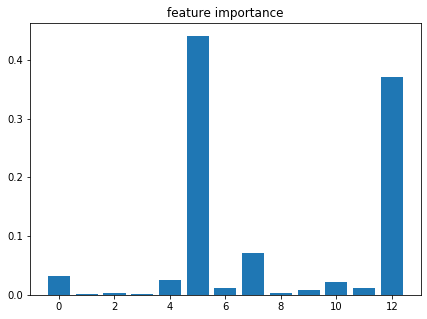

In [154]:
import matplotlib.pyplot as plt 

f, ax = plt.subplots(figsize=(7,5))
# 세팅, 도화지
ax.bar(range(0,len(rf.feature_importances_)),rf.feature_importances_)
ax.set_title('feature importance')

# 평가 : 예측 - 상관계수, mse()

In [146]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(Y, rf.predict(X))

2.02272371541502

In [147]:
mean_absolute_error(Y, rf.predict(X))

0.91

In [148]:
r2_score(Y,rf.predict(X))

0.9760396310106957

In [157]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # 0.75 : 0.25
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                   random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [161]:
#predict : score
print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [164]:
from sklearn.tree import export_graphviz
export_graphviz(forest.estimators_[0], out_file="tree.dot", class_names=["악성","양성"],
               feature_names = cancer.feature_names, impurity=False, filled=True)

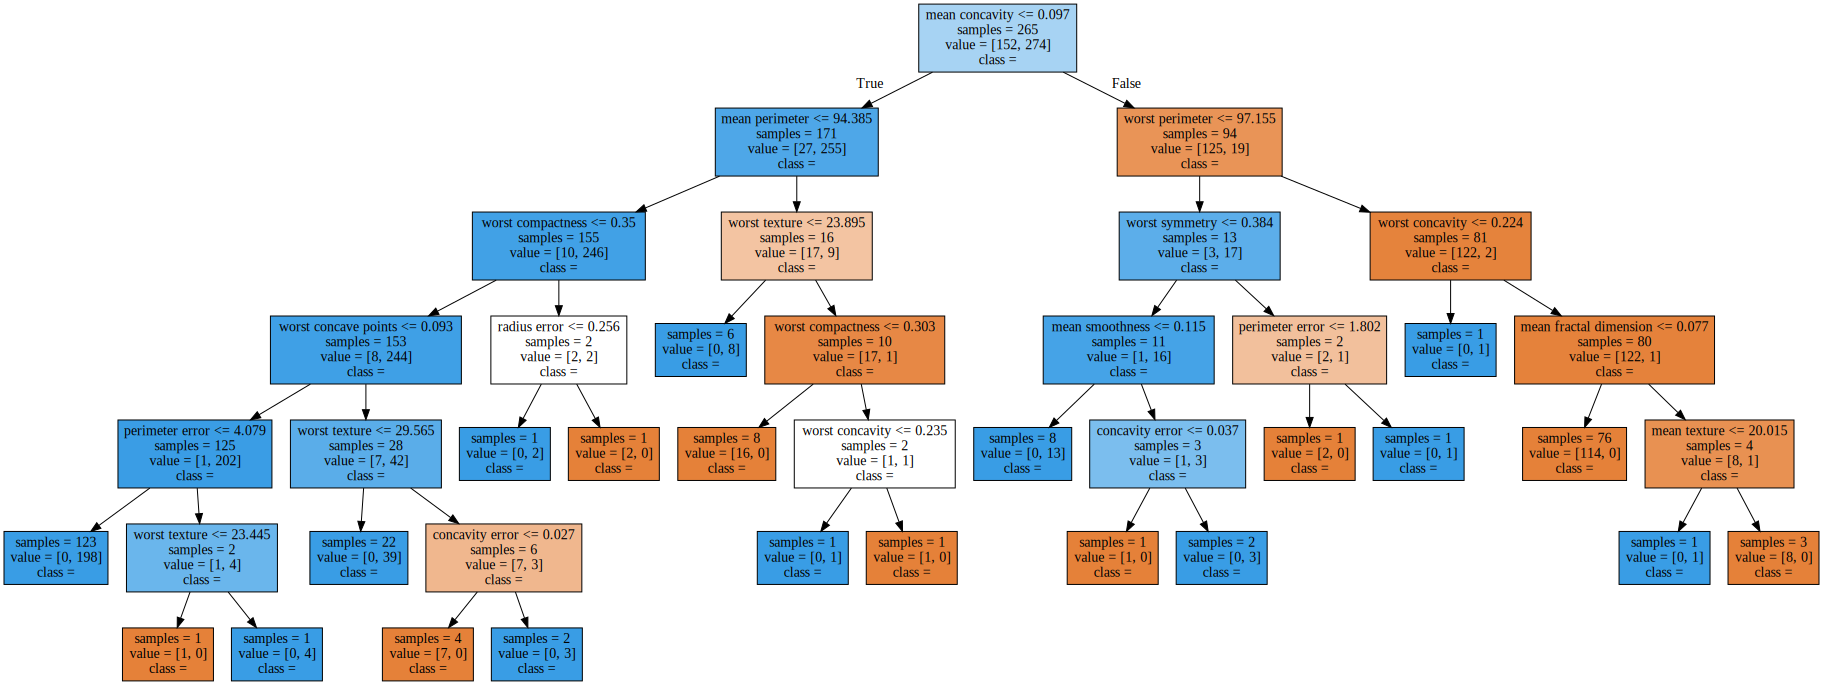

In [170]:
from IPython.display import display # IPython.display => Anaconda명령어
import graphviz

# 읽기용으로 읽어라.
with open("tree.dot","rt",encoding='UTF-8') as f: # rt: text
    dot_graph = f.read()
    
    
display(graphviz.Source(dot_graph)) # 이미지로 출력되어진다.

In [175]:
import pandas as pd

boston = load_boston() # data(독립변수), target(종속변수)
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names # boston의 열이름을 columns에

print(data.head())
data['PRICE'] = boston.target # 하나의 데이터로 묶음
print(data.info())
data.describe()

import xgboost as xgb
from sklearn.metrics import mean_squared_error # 평가

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64


In [185]:
# 데이터프레임은 ndarray + dict(순서를 보장, 중복을 허용)
X,y = data.iloc[:, :-1], data.iloc[:,-1] # 추가
data_dmatrix = xgb.DMatrix(data=X, label=y) # 전용행렬
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:linear', # 선형회귀
                          colsample_bytree=0.3,
                          learning_rate=0.1, # 경사하강법에의해 등장 -> optimization
                          max_depth = 5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test) # ybar(예측치)가 결정
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse)) # 10.4493

xgb.plot_tree(xg_reg, num_trees=0)
# rc : resource control
plt.rcParams['figure.figsize'] = [500,300]
plt.show()

C:\Users\ICT01_22\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\ICT01_22\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 10.449300


In [186]:
from numpy import loadtxt # 데이터 로딩 ndarray
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [189]:
dataset = loadtxt('pima.data',delimiter=",") 
X = dataset[:,0:8]
Y = dataset[:,8]
seed = 7
test_size= 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


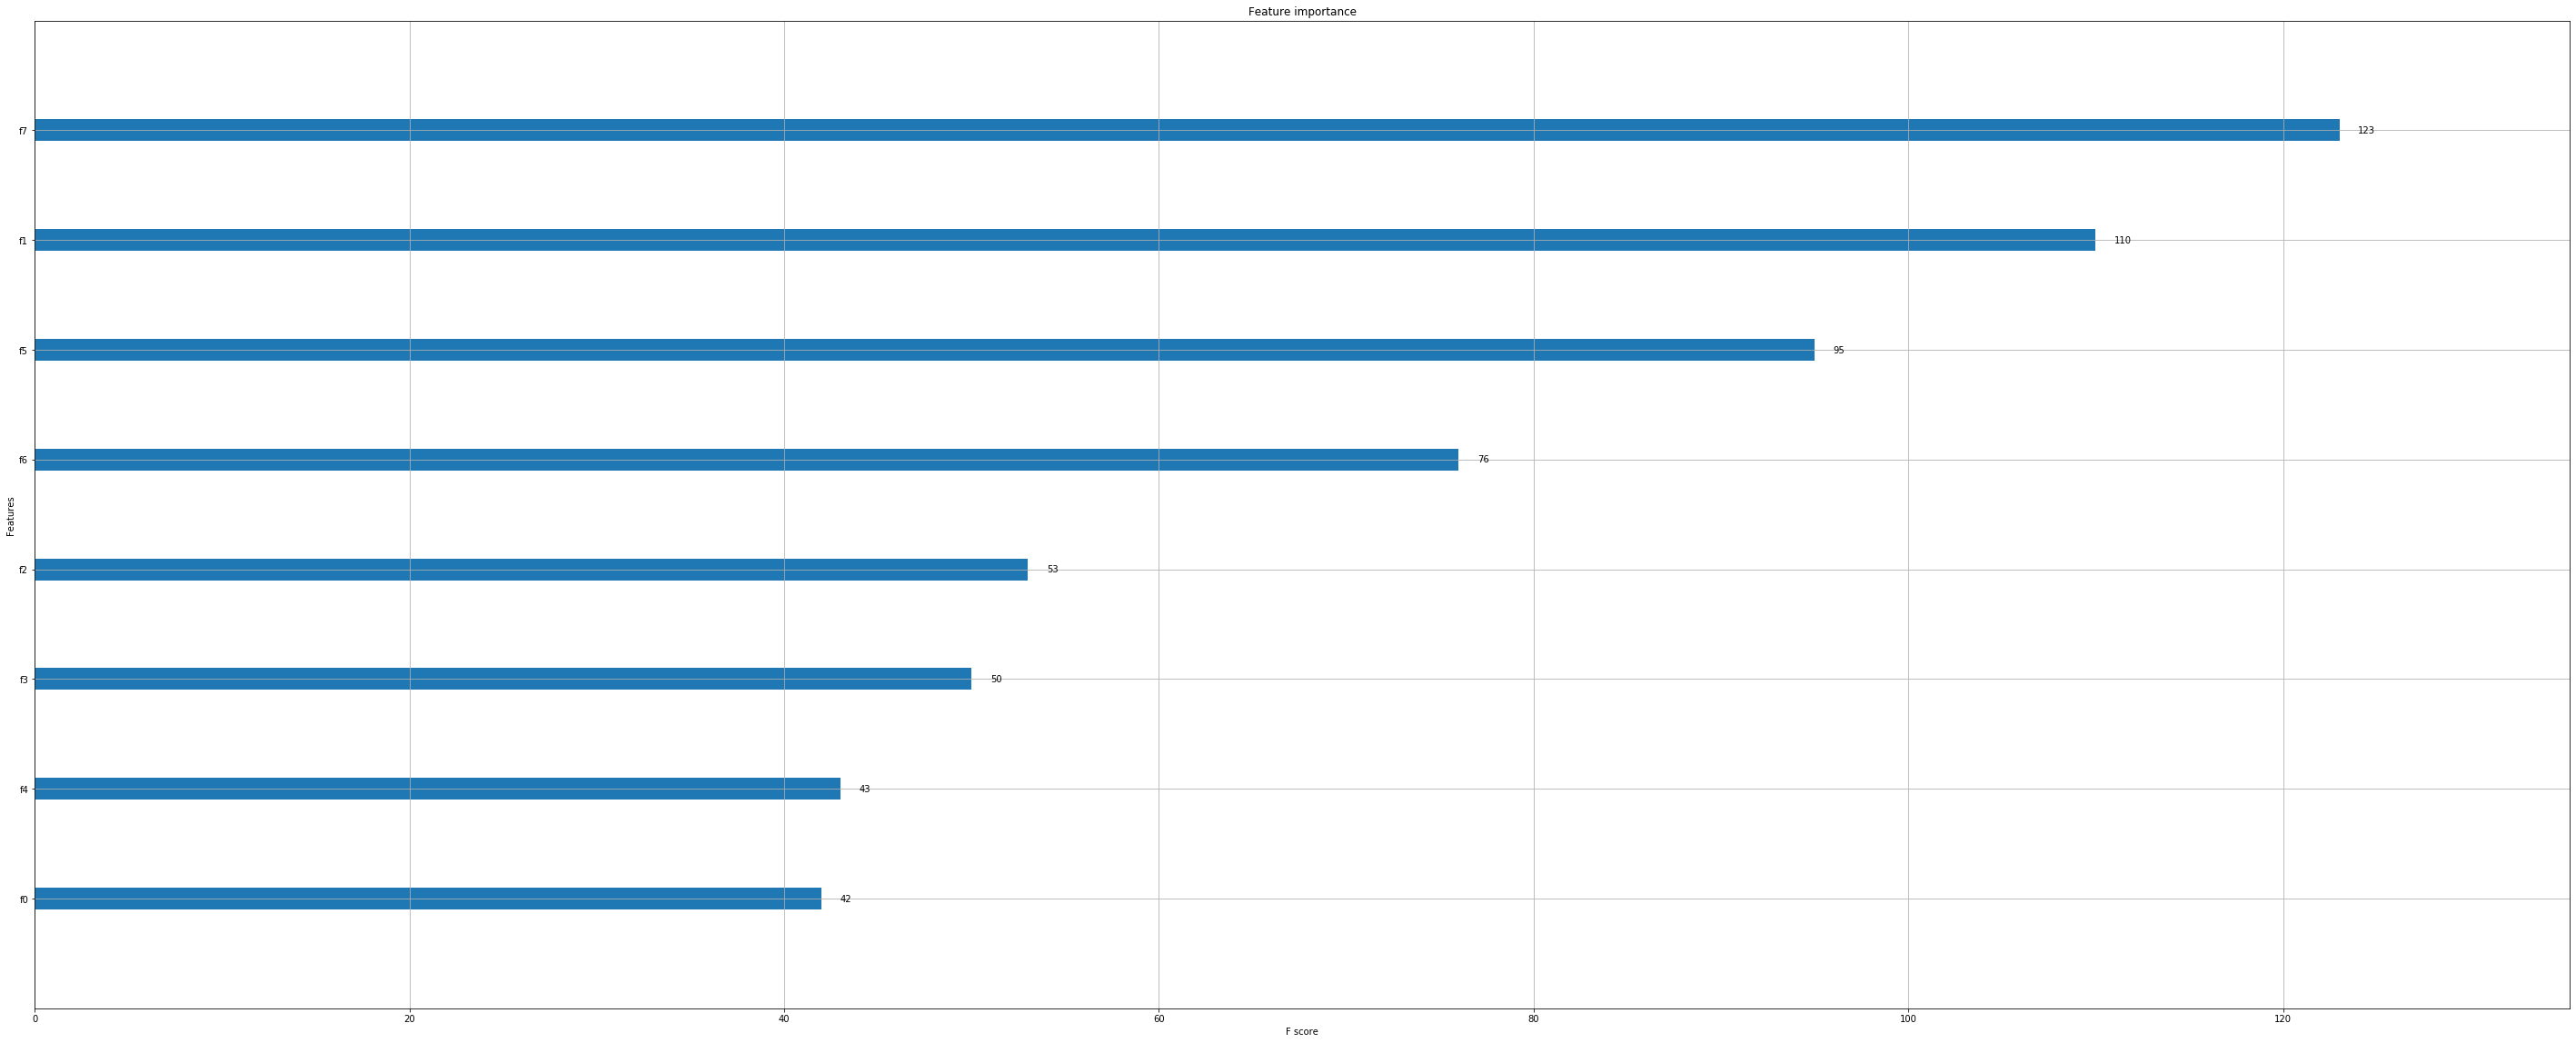

In [194]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
plt.rcParams['figure.figsize'] = [50,20]
# plt.show()
pyplot.show()

In [199]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.]


In [205]:
accuracy = accuracy_score(y_test, y_pred)
print("정확도: %.2f%%" % (accuracy * 100.0))

정확도: 77.95%


In [206]:
from sklearn.feature_selection import SelectFromModel
thresholds = np.sort(model.feature_importances_) # 오름차순

In [209]:
for thresh in thresholds: # 경계선
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # 경계선 이하의 중요성을 가진 변수 제거
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    select_X_test = selection.transform(X_test) # 테스트용데이터 변수
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    #     print("Thresh=%.3f, n=%d, Accuracy: %.2%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh = %.3f, n=%d, Accuracy : %.2f%%" %(thresh, select_X_train.shape[1], accuracy*100.0))

Thresh = 0.078, n=8, Accuracy : 77.95%
Thresh = 0.080, n=7, Accuracy : 76.38%
Thresh = 0.085, n=6, Accuracy : 77.56%
Thresh = 0.095, n=5, Accuracy : 76.38%
Thresh = 0.102, n=4, Accuracy : 76.38%
Thresh = 0.109, n=3, Accuracy : 74.80%
Thresh = 0.160, n=2, Accuracy : 75.98%
Thresh = 0.292, n=1, Accuracy : 70.08%


In [213]:
import pickle # 메모리의 내용을 그대로 저장

pickle.dump(model, open('pima.pickle.dat', 'wb'))
loaded_model = pickle.load(open('pima.pickle.dat', 'rb')) # binary
y_pred = loaded_model.predict(X_test)
predictions = [round(value) for value in y
               _pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy : %.2f%%" %(accuracy*100.0))

Accuracy : 77.95%
